In [190]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from copy import deepcopy
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import re
import pandas as pd
import seaborn as sns
from math import ceil
from sklearn.linear_model import LinearRegression

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)
from sr_model.models.models import AnalyticSR, STDP_SR, Linear
from datasets import inputs, sf_inputs_discrete
import configs

device = 'cpu'

# Collect metrics over datasets
You will have to run the corresponding python file to this jupyter notebook (will have the same title, but with 'parfor' attached).

In [191]:
model = 'rnn_tanh'

In [192]:
root_dir = '/Volumes/aronov-locker/Ching/03_hannah_dset/'

In [193]:
log2_e = 1.442695
nats_to_bits = lambda x: log2_e*x

In [194]:
dset = {
    'Sigmas': [],
    'Sparsities': [],
    'Field Sizes': [],
    'Field Size KLs': [],
    'Num Fields': [],
    'Num Field KLs': [],
    'Total KLs': [],
    'Gammas': []
    }

In [195]:
for gamma in [0.4, 0.5, 0.6, 0.75, 0.8]:
    with open(f'{root_dir}5a_{model}_results_gamma{gamma}.p', 'rb') as f:
        result = pickle.load(f)
        
    sigmas = np.array(result['sigmas'])
    final_sparsities = np.array(result['final_sparsities'])
    final_sparsities = np.around(final_sparsities, decimals=2)
    fieldsizes = np.array(result['fieldsizes'])
    nfields = np.array(result['nfields'])
    fieldsizekls = nats_to_bits(np.array(result['fieldsizekls']))
    nfieldkls = nats_to_bits(np.array(result['nfieldkls']))
    kls = fieldsizekls + nfieldkls
    
    if final_sparsities.size != fieldsizekls.size:
        print(gamma)
    
    dset['Sigmas'].extend(sigmas.tolist())
    dset['Sparsities'].extend(final_sparsities.tolist())
    dset['Field Sizes'].extend(fieldsizes.tolist())
    dset['Field Size KLs'].extend(fieldsizekls.tolist())
    dset['Num Fields'].extend(nfields.tolist())
    dset['Num Field KLs'].extend(nfieldkls.tolist())
    dset['Total KLs'].extend(kls.tolist())
    dset['Gammas'].extend([gamma]*sigmas.size)

In [196]:
from scipy import stats

# Metrics as a function of $\gamma$

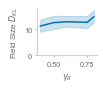

In [197]:
df = pd.DataFrame(dset)
df = df[df['Sparsities'] <= 0.2]
key = 'Field Size KLs'
df = df[(np.abs(stats.zscore(df[key])) < 4)]
fig, ax = plt.subplots(figsize=(1.5, 1.25))
sns.lineplot(
    x='Gammas', y=key,
    ax = ax, data=df
    )
plt.ylabel('Field Size $D_{KL}$')
plt.xlabel('$\gamma_R$')
plt.ylim(0)
plt.tight_layout()
plt.savefig('../figures/6j.png', dpi=300, transparent=True)

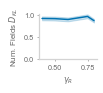

In [199]:
df = pd.DataFrame(dset)
df = df[df['Sparsities'] <= 0.2]
key = 'Num Field KLs'
df = df[(np.abs(stats.zscore(df[key])) < 4)]
fig, ax = plt.subplots(figsize=(1.5, 1.25))
sns.lineplot(
    x='Gammas', y=key,
    ax=ax, data=df
    )
plt.ylabel('Num. Fields $D_{KL}$')
plt.xlabel('$\gamma_R$')
plt.ylim(0)
plt.tight_layout()
plt.savefig('../figures/6k.png', dpi=300, transparent=True)